In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stock_module as sm
import random
import os
import datetime
import time
import openpyxl

In [3381]:
stock_name = "DOHOL"
start_date = "01-01-2015"
end_date = "31-07-2020"
MA_days = [7, 14, 20, 50, 100, 200]
RSI_day = 14
trajectory_day = 14

In [ ]:
frame = sm.whole_frame(stock_name, MA_days, start_date, end_date, RSI_day, trajectory_day)

/Users/mturan/Desktop/Scripts/stock_analysis/stock_module.py:1250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{column}_CH"] = data[f"{column}"].pct_change()


In [ ]:
# NOT: Hareketli Ortalama - MA
frame['check_1'] = frame['MA_200_CH'] > 0                  # -> 200 MA değerinin 14 günlük MA değeri büyüktür ??
frame['check_2'] = frame['MA_100_CH'] > -0.001             # -> 100 MA değerinin 14 günlük MA değeri büyüktür ??
frame['check_3'] = frame['MA_50_CH'] > -0.002              # -> 50 MA değerinin 14 günlük MA değeri büyüktür ??
frame['check_4'] = frame['MA_14_CH'] > -0.003              # -> 14 MA değerinin 14 günlük MA değeri büyüktür ??               
frame['check_5'] = frame['MA_14'] > (frame['MA_100']*0.90) # -> 14 MA, 100 MA değerinin ?? katından büyük
frame['check_6'] = frame['MA_20'] > (frame['MA_200']*0.95) # -> 20 MA, 200 MA değerinin ?? katından büyük
frame['check_7'] = frame['RSI_5'] > 35                     # -> RSI büyüktür ??
frame['check_8'] = frame["StockValue_momentum"] > 100      # -> 14 günlük Momentum değeri büyüktür ??

frame['check_9'] = frame["MA_14_CH_CH"] > -2               # -> 14 MA değerinin, 14 MA değerinin, 7 günlük trajectory
frame['check_10'] = frame["MA_50_CH_CH"] > -1              # -> 50 MA değerinin, 14 MA değerinin, 7 günlük trajectory
frame['check_11'] = frame["MA_100_CH_CH"] > -0.5           # -> 100 MA değerinin, 14 MA değerinin, 7 günlük trajectory
frame['check_12'] = frame["MA_200_CH_CH"] > -0.1           # -> 200 MA değerinin, 14 MA değerinin, 7 günlük trajectory

frame['check_13'] = frame['market_positive_ma_10'] > 0.35  # -> Markette artış gösteren hisse değerlerlerinin 10 MA değeri
frame['check_14'] = frame['RSI_5_CH'] > -0.02              # -> RSI değerinin 5 MA değeri
frame['check_15'] = frame['RSI_CH'] > -0.02                # -> RSI 7 günlük trajectory

In [ ]:
first_check_columns = ["check_1", "check_2", "check_3", "check_4",
                      "check_5", "check_6", "check_7", "check_8"]

second_check_columns = ["check_9", "check_10", "check_11", "check_12"]

third_check_columns = ["check_13", "check_14", "check_15"]

In [ ]:
frame["first_check"] = frame[first_check_columns].sum(axis=1)   # sum first check categories
frame["second_check"] = frame[second_check_columns].sum(axis=1) # sum first check categories
frame["third_check"] = frame[third_check_columns].sum(axis=1)   # sum first check categories

In [ ]:
frame['Recommendation'] = np.where((frame["first_check"] >= 8) &
                                   (frame["second_check"]>= 3) &
                                   (frame["third_check"] >= 2)
                                   ,"BUY", "SELL")

In [ ]:
locations = []
start = 0
for row in range(frame.shape[0]-1):
    if frame.Recommendation[row] == "BUY":
        mode = "BUY"
        if (frame.Recommendation[row] == "BUY" and frame.Recommendation[row+1] == "SELL"):
            end = row+1
            loc = [start, end]
            locations.append(loc)

    else:
        mode = "SELL"
        if (frame.Recommendation[row] == "SELL" and frame.Recommendation[row+1] == "BUY"):
            start = row+1

In [ ]:
locations

In [ ]:
duration = sum([i[1] - i[0] for i in locations])
print(f"Duration: {duration} days")

In [ ]:
print("Return for each transaction locations in frame:")
rets = [(frame.StockValue[obs[1]] - frame.StockValue[obs[0]]) / frame.StockValue[obs[0]] for obs in locations]
rets

In [ ]:
np.prod([1+ret for ret in rets if ret != 0])

In [ ]:
frame["StockValue"].plot(figsize=(30,7))

In [ ]:
test_frame = frame.iloc[12:13,-26:]

In [ ]:
test_frame["test_ch"] = test_frame["StockValue"].pct_change()

In [ ]:
test_frame

---

In [2]:
BIST50 = ["TUPRS", "VAKBN","TOASO","KRDMD","MGROS","DOHOL","AKBNK","TKFEN","FROTO","GARAN","KOZAA","HALKB",
         "KORDS","TCELL","ENKAI","KOZAL","VESTL","TSKB","YKBNK","SODA","TTKOM","SKBNK","BIMAS","ODAS","PETKM",
          "SISE","ANACM", "ARCLK", "YATAS", "EREGL", "SASA", "ALARK", "SAHOL", "AEFES", "EKGYO", "THYAO",
         "HEKTS", "PGSUS", "ISCTR", "TRKCM", "KCHOL", "ISFIN", "ASELS", "TAVHL","IPEKE","ULKER","CCOLA",
         "GUBRF","AGHOL", "ENJSA"]

In [3]:
BIST100 = ["GUSGR", "ALGYO", "KAREL", "ALKIM", "TTRAK", "LOGO", "AKCNS", "GOZDE", "BRSAN", 
           "ECZYT", "DOAS", "NETAS", "TMSN", "ZOREN", "CLEBI", "KERVT", "TRGYO", "AYGAZ", "GOODY",
          "ISMEN", "BRISA", "CEMTS", "AKSEN", "KARTN", "GLYHO", "ISGYO", "DEVA", "ECILC", "KARSN",
          "SARKY", "ALBRK", "ANHYT", "RYGYO", "BUCIM", "EGEEN", "CIMSA", "NTHOL", "HLGYO","MPARK",
          "SELEC", "OZKGY", "OTKAR", "AKSA", "AKGRT", "KLMSN", "BIZIM", "TATGD", "ISDMR", "MAVI",
          "SOKM"]

In [4]:
frame_ = pd.read_pickle("frame_whole_BIST50")

In [5]:
start_date = "01-01-2015"
end_date = "31-01-2020"
stocks = BIST50

In [3191]:
returns = []
durations = []
locationAll = []  
for stock_name in stocks:
    frame = frame_.loc[frame_["stock_name"] == stock_name]
    frame = frame.loc[frame.index > start_date]
    frame = frame.loc[frame.index < end_date]
    
    # NOT: Hareketli Ortalama - MA
    frame['check_1'] = frame['MA_200_CH'] > 0                  # -> 200 MA değerinin 14 günlük MA değeri büyüktür ??
    frame['check_2'] = frame['MA_100_CH'] > -0.001             # -> 100 MA değerinin 14 günlük MA değeri büyüktür ??
    frame['check_3'] = frame['MA_50_CH'] > -0.002              # -> 50 MA değerinin 14 günlük MA değeri büyüktür ??
    frame['check_4'] = frame['MA_14_CH'] > -0.003              # -> 14 MA değerinin 14 günlük MA değeri büyüktür ??               
    frame['check_5'] = frame['MA_14'] > (frame['MA_100']*0.95) # -> 14 MA, 100 MA değerinin ?? katından büyük
    frame['check_6'] = frame['MA_20'] > (frame['MA_200']*0.95) # -> 20 MA, 200 MA değerinin ?? katından 
    frame['check_x'] = frame['MA_7'] > (frame['MA_50']*0.95) # -> 20 MA, 200 MA değerinin ?? katından 
    frame['check_7'] = frame['RSI_5'] > 35                     # -> RSI büyüktür ??
    frame['check_8'] = frame["StockValue_momentum"] > 100      # -> 14 günlük Momentum değeri büyüktür ??
    frame['check_y'] = frame["MA_7_CH_CH"] > -3              # -> 14 MA değerinin, 14 MA değerinin, 7 günlük trajectory
    
    frame['check_9'] = frame["MA_14_CH_CH"] > -2               # -> 14 MA değerinin, 14 MA değerinin, 7 günlük trajectory
    frame['check_10'] = frame["MA_50_CH_CH"] > -1              # -> 50 MA değerinin, 14 MA değerinin, 7 günlük trajectory
    frame['check_11'] = frame["MA_100_CH_CH"] > -0.1           # -> 100 MA değerinin, 14 MA değerinin, 7 günlük trajectory
    frame['check_12'] = frame["MA_200_CH_CH"] > -0.5           # -> 200 MA değerinin, 14 MA değerinin, 7 günlük trajectory

    frame['check_13'] = frame['market_positive_ma_10'] > 0.4  # -> Markette artış gösteren hisse değerlerlerinin 10 MA değeri
    frame['check_14'] = frame['RSI_5_CH'] > -0.02              # -> RSI değerinin 5 MA değeri
    frame['check_15'] = frame['RSI_CH'] > -0.02                # -> RSI 7 günlük trajectory

    first_check_columns = ["check_1", "check_2", "check_3", "check_4", "check_x", "check_y",
                      "check_5", "check_6", "check_7", "check_8"]

    second_check_columns = ["check_9", "check_10", "check_11", "check_12"]

    third_check_columns = ["check_13", "check_14", "check_15"]
    
    frame["first_check"] = frame[first_check_columns].sum(axis=1)   # sum first check categories
    frame["second_check"] = frame[second_check_columns].sum(axis=1) # sum first check categories
    frame["third_check"] = frame[third_check_columns].sum(axis=1)   # sum first check categories
    
    frame['Recommendation'] = np.where((frame["first_check"] >= 10) &
                                   (frame["second_check"]>= 4) &
                                   (frame["third_check"] >= 3)
                                   ,"BUY", "SELL")
    
    locations = []
    start = 0
    for row in range(frame.shape[0]-1):
        if frame.Recommendation[row] == "BUY":
            mode = "BUY"
            if (frame.Recommendation[row] == "BUY" and frame.Recommendation[row+1] == "SELL"):
                end = row+1
                loc = [start, end]
                locations.append(loc)

        else:
            mode = "SELL"
            if (frame.Recommendation[row] == "SELL" and frame.Recommendation[row+1] == "BUY"):
                start = row+1
    
    duration = sum([i[1] - i[0] for i in locations])         
    rets = [(frame.StockValue[obs[1]] - frame.StockValue[obs[0]]) / frame.StockValue[obs[0]] for obs in locations]
    
    total_return = np.prod([1+ret for ret in rets if ret != 0])
    
    returns.append(total_return)
    durations.append(duration)
    locationAll.append(locations)

In [3192]:
premium = 9/10000
sum([len(loc)*2 for loc in locationAll]) * premium

3.7043999999999997

In [3193]:
df = pd.DataFrame(list(zip(stocks, returns, durations)), 
               columns =['stocks', "returns", 'durations']) 

df = df.sort_values(by=["returns"], ascending=False)

In [3194]:
root = df.durations.sum() / 1000
root

14.792

In [3195]:
pow(np.prod(df.returns), 1/root)

2.8047823367621385

---

In [9]:
frame_ = pd.read_pickle("frame_whole_BIST50")

In [10]:
start_date = "01-03-2014"
end_date = "31-07-2020"
stock_name = "PGSUS"

In [11]:
frame = frame_.loc[frame_["stock_name"] == stock_name]
frame = frame.loc[frame.index > start_date]
frame = frame.loc[frame.index < end_date]

In [12]:
# NOT: Hareketli Ortalama - MA
threshold_1 = -0.001
frame['check_1'] = frame['MA_200_CH'] > threshold_1                  
frame["check_1_value"] = (frame['MA_200_CH'] - threshold_1) * 100

threshold_2 = -0.002
frame['check_2'] = frame['MA_100_CH'] > threshold_2          
frame["check_2_value"] = (frame['MA_100_CH'] - threshold_2) * 100

threshold_3 = -0.003
frame['check_3'] = frame['MA_50_CH'] > threshold_3           
frame["check_3_value"] = (frame['MA_50_CH'] - threshold_3) * 100

threshold_4 = -0.004
frame['check_4'] = frame['MA_14_CH'] > threshold_4           
frame["check_4_value"] = (frame['MA_14_CH'] - threshold_4) * 100



threshold_5 = (frame['MA_100']*0.95)
frame['check_5'] = frame['MA_14'] > threshold_5 
frame["check_5_value"] = (frame['MA_14'] - threshold_5) / threshold_5

threshold_6 = (frame['MA_200']*0.95) 
frame['check_6'] = frame['MA_20'] > threshold_6
frame["check_6_value"] = (frame['MA_20'] - threshold_6) / threshold_6

# threshold_7 = (frame['MA_50']*1) 
# frame['check_7'] = frame['MA_7'] > threshold_7
# frame["check_7_value"] = (frame['MA_7'] - threshold_7) / threshold_7


threshold_8 = 35
frame['check_8'] = frame['RSI_5'] > threshold_8               
frame["check_8_value"] = (frame['RSI_5'] - threshold_8) / threshold_8

threshold_9 = 100
frame['check_9'] = frame["StockValue_momentum"] > threshold_9 
frame["check_9_value"] = (frame['StockValue_momentum'] - threshold_9) / threshold_9


frame['check_10'] = frame["MA_7_CH_CH"] > -3      
frame['check_11'] = frame["MA_14_CH_CH"] > -2               # -> 14 MA değerinin, 14 MA değerinin, 7 günlük trajectory
frame['check_12'] = frame["MA_50_CH_CH"] > -1              # -> 50 MA değerinin, 14 MA değerinin, 7 günlük trajectory
frame['check_13'] = frame["MA_100_CH_CH"] > -0.1           # -> 100 MA değerinin, 14 MA değerinin, 7 günlük trajectory
frame['check_14'] = frame["MA_200_CH_CH"] > -0.5           # -> 200 MA değerinin, 14 MA değerinin, 7 günlük trajectory

frame['check_15'] = frame['market_positive_ma_10'] > 0.35  # -> Markette artış gösteren hisse değerlerlerinin 10 MA değeri
frame['check_16'] = frame['RSI_5_CH'] > -0.02              # -> RSI değerinin 5 MA değeri
frame['check_17'] = frame['RSI_CH'] > -0.02                # -> RSI 7 günlük trajectory

first_check_columns = ["check_1", "check_2", "check_3", "check_4"]

second_check_columns = ["check_5", "check_6"] 

third_check_columns = ["check_8", "check_9"]

fourth_check_columns = ["check_10", "check_11", "check_12", "check_13", "check_14"]

fifth_check_columns = ["check_15", "check_16", "check_17"]



In [13]:
frame["first_check"] = frame[first_check_columns].sum(axis=1)   # sum first check categories
frame["second_check"] = frame[second_check_columns].sum(axis=1) 
frame["third_check"] = frame[third_check_columns].sum(axis=1)  
frame["fourth_check"] = frame[fourth_check_columns].sum(axis=1)  
frame["fifth_check"] = frame[fifth_check_columns].sum(axis=1)  

frame['Recommendation'] = np.where((frame["first_check"] >= 3) &
                                   (frame["second_check"]>= 2) &
                                   (frame["third_check"] >= 1) &
                                   (frame["fourth_check"] >= 4) &
                                   (frame["fifth_check"] >= 2)
                                   ,"BUY", "SELL")

In [14]:
columns = ["check_1_value", "check_2_value", "check_3_value","check_4_value", 
           "check_5_value", "check_6_value"
           # , "check_7_value"
           , "check_8_value"
           ,"check_9_value"
          ] 

frame["total_check_amount"] = frame[columns].sum(axis = 1, skipna = True)
frame["total_check_change_daily"] = frame["total_check_amount"].pct_change()
frame["total_check_mean"] = (frame.iloc[-50:,:]["total_check_amount"].mean()) # son 250 gün ortalamasının %60'ı

frame = frame.dropna()

In [15]:
locations = []
start = 0
for row in range(frame.shape[0]-1):
    if frame.Recommendation[row] == "BUY":
        mode = "BUY"
        if (frame.Recommendation[row] == "BUY" and frame.Recommendation[row+1] == "SELL"):
            end = row+1
            loc = [start, end]
            locations.append(loc)

    else:
        mode = "SELL"
        if (frame.Recommendation[row] == "SELL" and frame.Recommendation[row+1] == "BUY"):
            start = row+1

In [16]:
frame["MA_7_50"] = frame["MA_7"] - frame["MA_50"]
frame["MA_14_100"] = frame["MA_14"] - frame["MA_100"]
frame["MA_50_200"] = frame["MA_50"] - frame["MA_200"]

In [17]:
def short_moving_average(frame, day):
    """
    Kısa hareketli ortalama hesaplamaları için.
    """
    SMAs = []
    for i in range(frame.shape[0]):
        sma = frame[i:i+day].rolling(window=day).mean()
        sma = sma.iloc[-1,:]
        SMAs.append(sma)
    SMAs = pd.concat(SMAs, axis=1) 
    SMAs = SMAs.T
    SMAs = SMAs.dropna()
    
    return SMAs

In [18]:
SMA = sm.short_moving_average(frame[["MA_7_50", "MA_14_100","MA_50_200"]],200)

In [3371]:
SMA

,MA_7_50,MA_14_100,MA_50_200
2015-01-13,0.470778,-0.364345,-2.439356
2015-01-14,0.496097,-0.306181,-2.411635
2015-01-15,0.518886,-0.249059,-2.382443
2015-01-16,0.538474,-0.193621,-2.352045
2015-01-19,0.553238,-0.140131,-2.320608
...,...,...,...
2020-06-15,0.249325,1.432913,9.799799
2020-06-16,0.182476,1.346050,9.664170
2020-06-17,0.110249,1.253239,9.528986
2020-06-18,0.038646,1.154919,9.394780


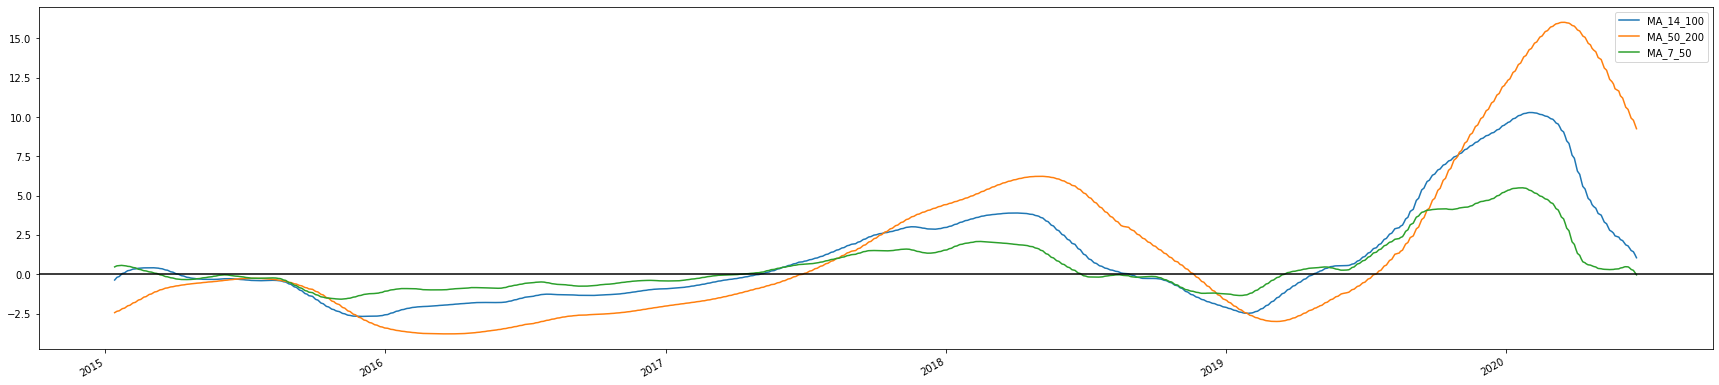

In [3372]:
SMA[["MA_14_100","MA_50_200","MA_7_50"]].plot(figsize=(30,7))
plt.axhline(0, color="black")

In [3373]:
SMA = momentum_frame(SMA, list(SMA), 7)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


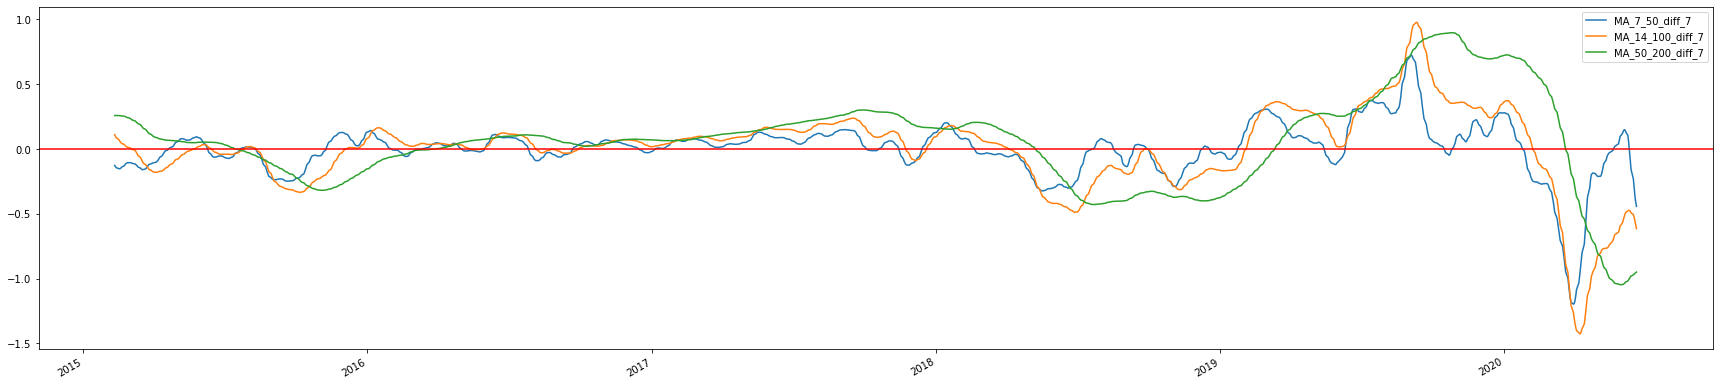

In [3374]:
SMA[list(SMA)[-3:]].plot(figsize=(30,7))
plt.axhline(0, color="red")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


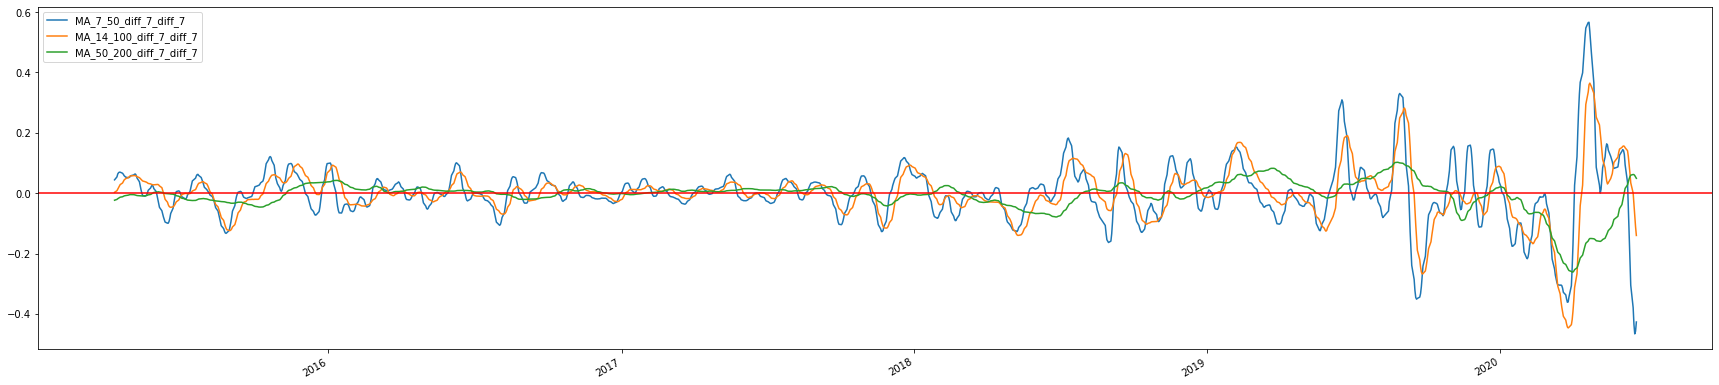

In [3375]:
SMA = momentum_frame(SMA, list(SMA), 7)
SMA[list(SMA)[-3:]].plot(figsize=(30,7))
plt.axhline(0, color="red")

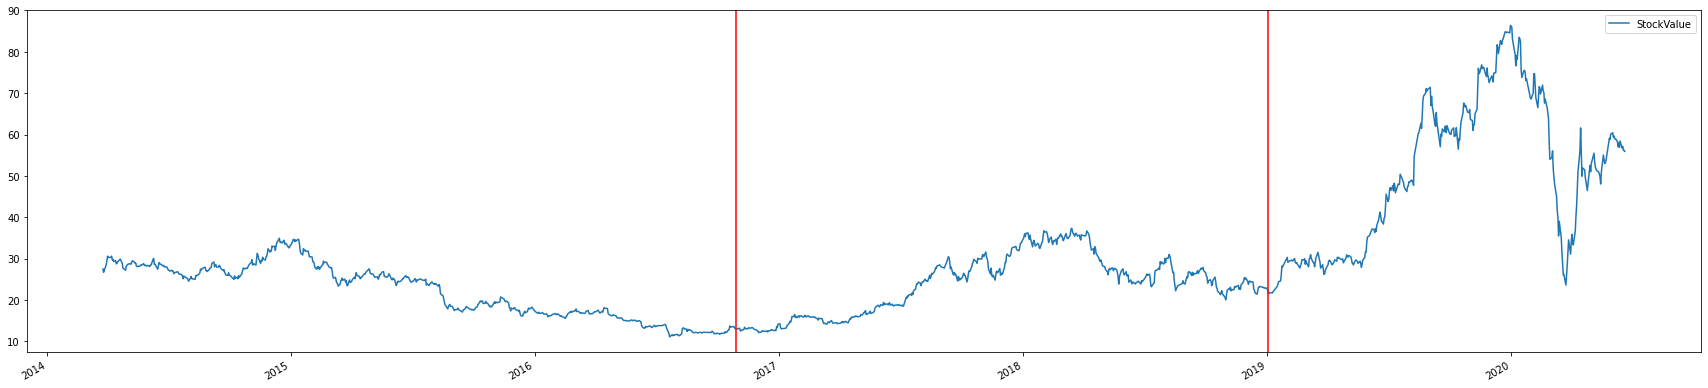

In [3376]:
frame[["StockValue"]].plot(figsize=(30,7))
plt.axvline(frame.index[650], color="red")
plt.axvline(frame.index[1200], color="red")

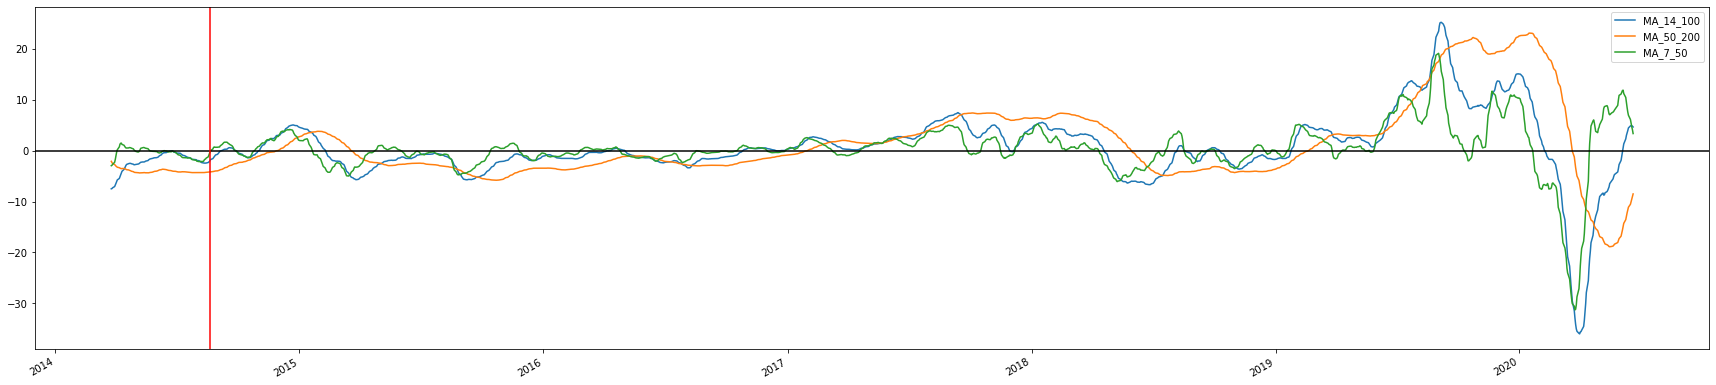

In [3377]:
frame[["MA_14_100","MA_50_200","MA_7_50"]].plot(figsize=(30,7))
plt.axhline(0, color="black")
plt.axvline(frame.index[100], color="red")

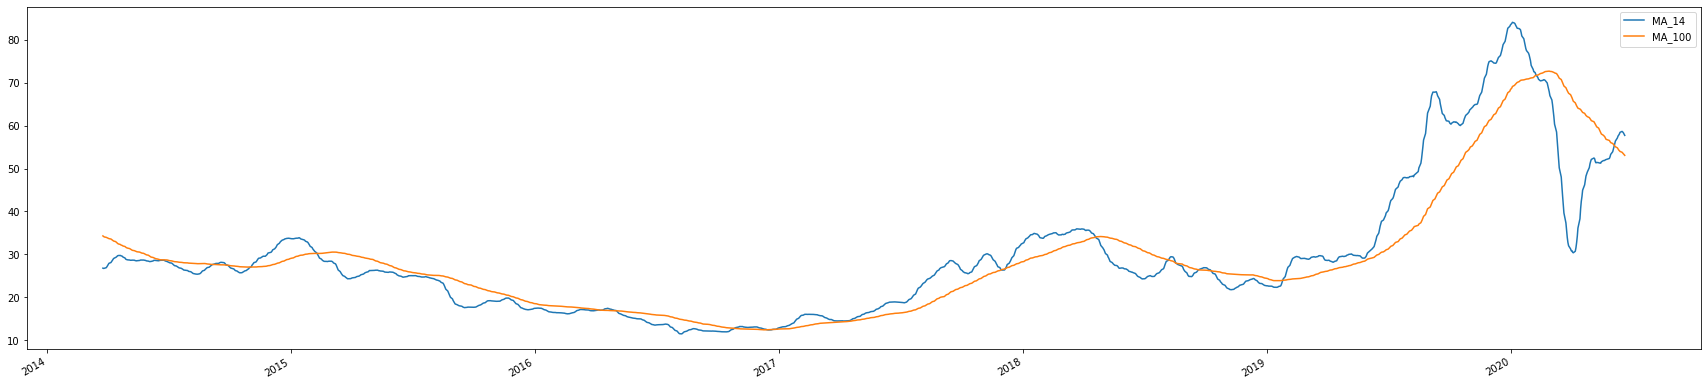

In [3378]:
frame[["MA_14","MA_100"]].plot(figsize=(30,7))

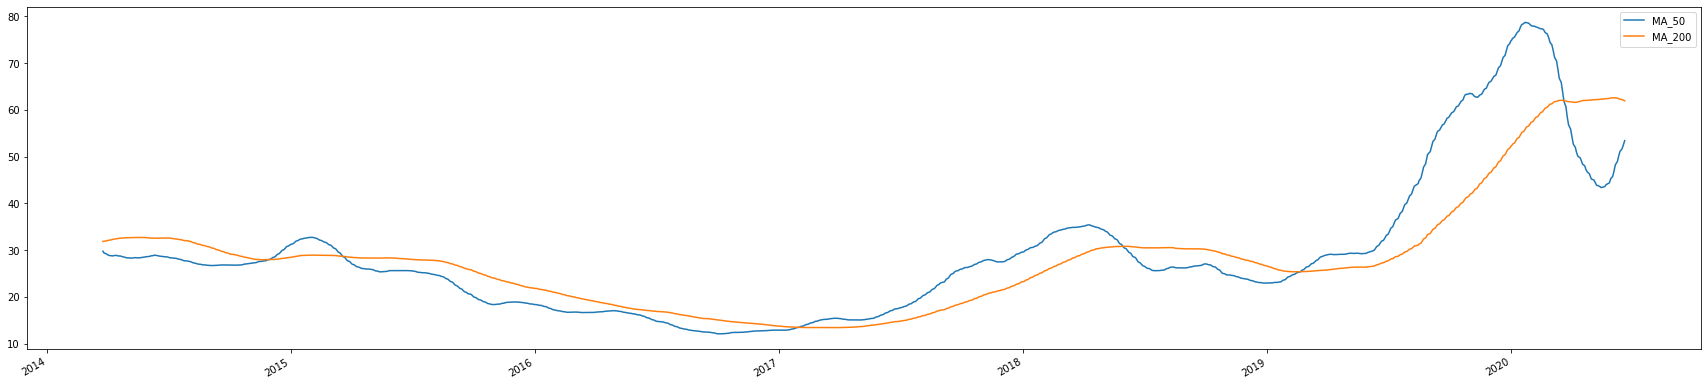

In [3379]:
frame[["MA_50","MA_200"]].plot(figsize=(30,7))

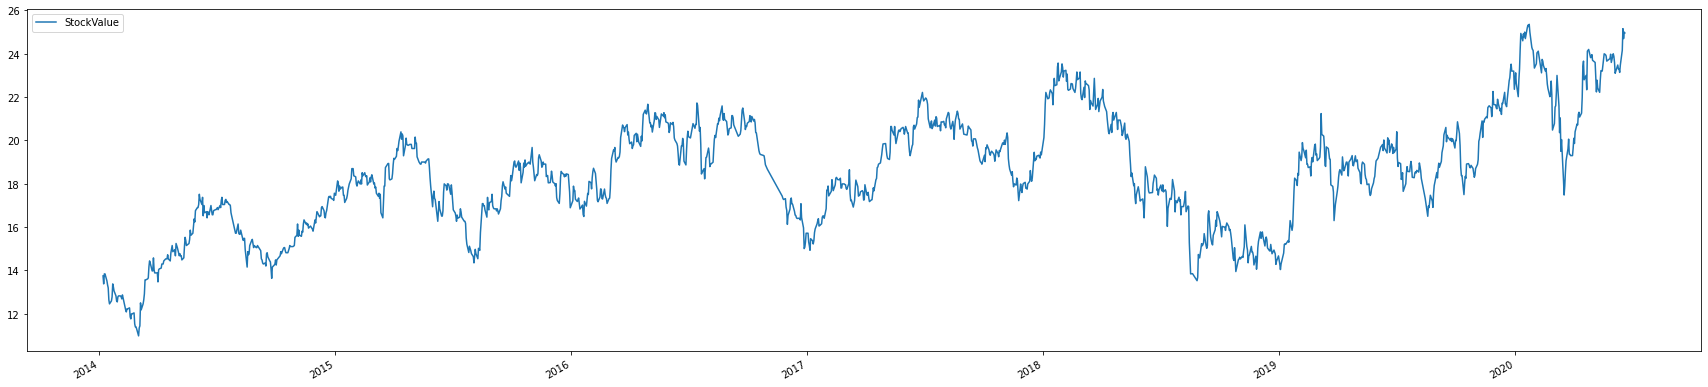

In [3132]:
frame[["StockValue"]].plot(figsize=(30,7))

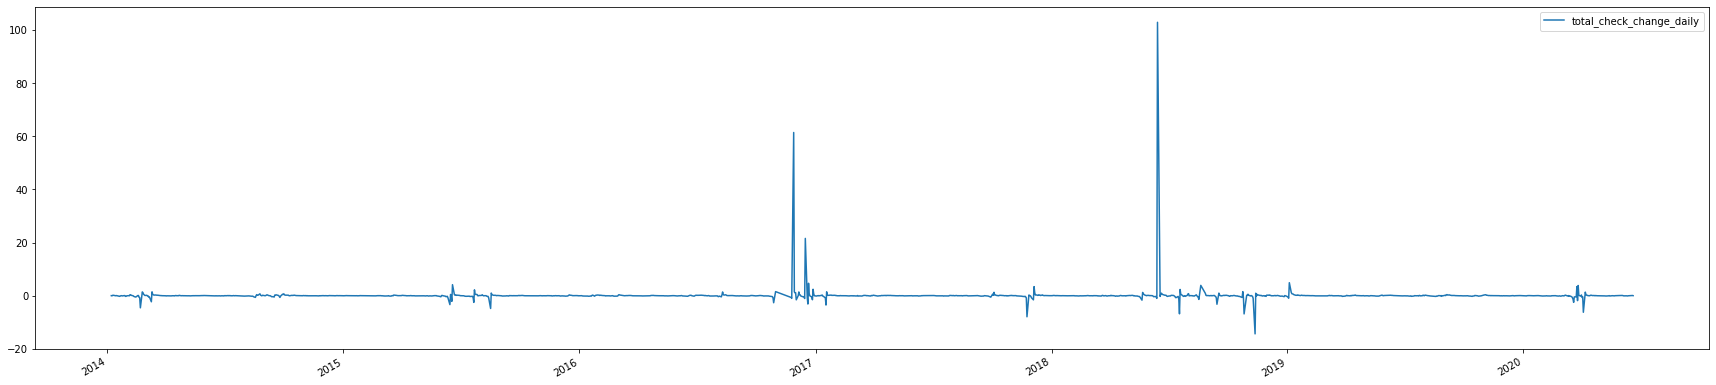

In [3133]:
frame[["total_check_change_daily"]].plot(figsize=(30,7))

In [3134]:
from sklearn.preprocessing import scale
frame["total_check_change_daily"] = scale(frame["total_check_change_daily"])

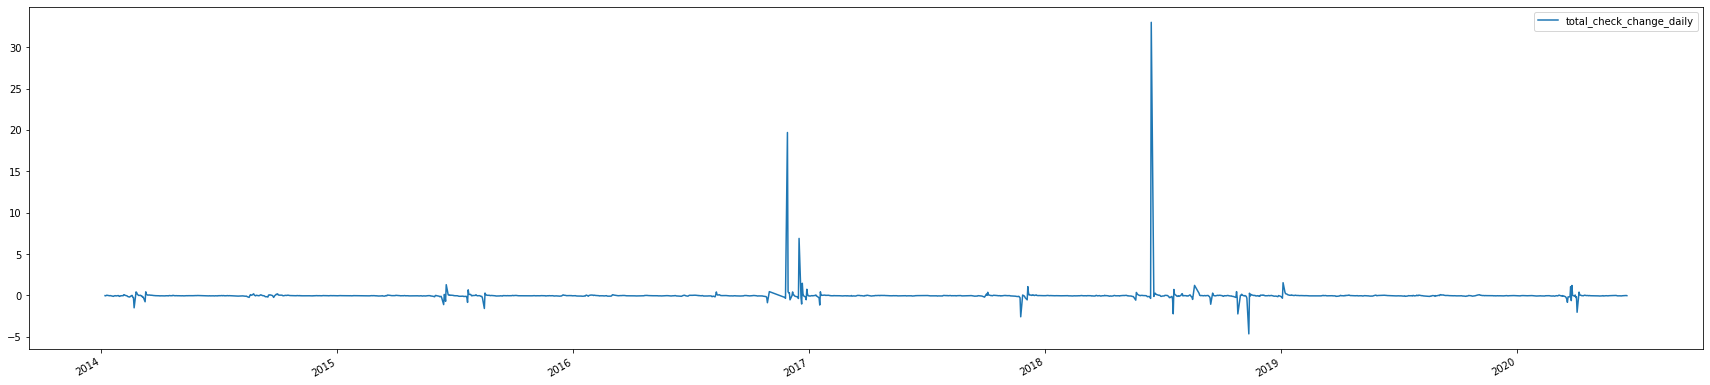

In [3135]:
frame[["total_check_change_daily"]].plot(figsize=(30,7))

In [3136]:
["Drawdown", "RSI_CH", "RSI_5_CH", "MA_7_CH", "MA_14_CH", "MA_20_CH", "MA_50_CH", "MA_100_CH", "MA_209_CH",
"volume", "volume_ma_14", "total_check_amount"]

['Drawdown',
 'RSI_CH',
 'RSI_5_CH',
 'MA_7_CH',
 'MA_14_CH',
 'MA_20_CH',
 'MA_50_CH',
 'MA_100_CH',
 'MA_209_CH',
 'volume',
 'volume_ma_14',
 'total_check_amount']

In [3137]:
index

1

In [3138]:
list(frame)

['MA_7',
 'MA_14',
 'MA_20',
 'MA_50',
 'MA_100',
 'MA_200',
 'MA_7_CH',
 'MA_7_CH_CH',
 'MA_14_CH',
 'MA_14_CH_CH',
 'MA_20_CH',
 'MA_20_CH_CH',
 'MA_50_CH',
 'MA_50_CH_CH',
 'MA_100_CH',
 'MA_100_CH_CH',
 'MA_200_CH',
 'MA_200_CH_CH',
 'RSI',
 'RSI_CH',
 'RSI_5',
 'RSI_5_CH',
 'Drawdown',
 'marketV_to_bookV',
 'StockValue',
 'StockValue_momentum',
 'market_positive',
 'market_positive_ma_10',
 'stock_name',
 'volume',
 'volume_ma_14',
 'check_1',
 'check_1_value',
 'check_2',
 'check_2_value',
 'check_3',
 'check_3_value',
 'check_4',
 'check_4_value',
 'check_5',
 'check_5_value',
 'check_6',
 'check_6_value',
 'check_8',
 'check_8_value',
 'check_9',
 'check_9_value',
 'check_10',
 'check_11',
 'check_12',
 'check_13',
 'check_14',
 'check_15',
 'check_16',
 'check_17',
 'first_check',
 'second_check',
 'third_check',
 'fourth_check',
 'fifth_check',
 'Recommendation',
 'total_check_amount',
 'total_check_change_daily',
 'total_check_mean',
 'MA_7_50',
 'MA_14_100',
 'MA_50_200']

In [3139]:
rets = [(frame.StockValue[obs[1]] - frame.StockValue[obs[0]]) / frame.StockValue[obs[0]] for obs in locations]

In [3140]:
print("duration")
sum([i[1] - i[0] for i in locations])

duration


850

In [3141]:
[locs[0] for locs in locations]

[0,
 53,
 68,
 71,
 91,
 122,
 158,
 201,
 301,
 334,
 337,
 374,
 426,
 454,
 490,
 514,
 521,
 543,
 550,
 555,
 573,
 576,
 578,
 600,
 623,
 656,
 674,
 680,
 776,
 779,
 782,
 785,
 787,
 800,
 806,
 815,
 837,
 846,
 849,
 880,
 937,
 987,
 1013,
 1020,
 1025,
 1064,
 1259,
 1284,
 1306,
 1330,
 1332,
 1334,
 1341,
 1374,
 1408,
 1438,
 1443,
 1477,
 1480,
 1512,
 1514,
 1522,
 1535,
 1565,
 1581]

In [3142]:
rets

[-0.08389039621172995,
 -0.003526746820003437,
 0.006558671366932354,
 0.05862965817140971,
 0.10000000000000017,
 -0.06478677131245579,
 -0.021539481466556633,
 0.16301583938125774,
 0.09682755229201949,
 0.0,
 -0.0025258505012233676,
 -0.053073341094295665,
 0.1002728117018806,
 -0.05569359816412132,
 -0.0661493893902518,
 0.029104427827205008,
 -0.0377491220490323,
 0.10691420534458516,
 0.013134422606362035,
 -0.01653249636225479,
 -0.009586239187757285,
 0.023669988948259554,
 0.031158807305926864,
 -0.06537915364953137,
 -0.03281205945140362,
 0.04154684388022196,
 -0.015711557282808042,
 -0.08726861479650252,
 -0.0016227541249631517,
 -0.002187839213502832,
 -0.05842097641815547,
 -0.01861398310244658,
 0.010819798826684315,
 -0.026003608982356225,
 0.0539560006490948,
 0.08164139784377406,
 -0.005765547433842715,
 -0.02628976263523319,
 0.060752824357870085,
 -0.03769966825826001,
 -0.07342985646032305,
 0.20000308266157008,
 -0.021997977494244415,
 -0.009566817341459763,
 -0.0

In [3143]:
total_return = np.prod([1+ret for ret in rets if ret != 0])

In [3144]:
total_return

0.9096202097747178

In [3145]:
def short_moving_average(frame, day):
    """
    Kısa hareketli ortalama hesaplamaları için.
    """
    SMAs = []
    for i in range(frame.shape[0]):
        sma = frame[i:i+day].rolling(window=day).mean()
        sma = sma.iloc[-1,:]
        SMAs.append(sma)
    SMAs = pd.concat(SMAs, axis=1) 
    SMAs = SMAs.T
    SMAs = SMAs.dropna()
    
    SMAs = SMAs.rename(columns={"total_check_change_daily": f"total_check_change_daily_{day}"})
    
    return SMAs

In [3146]:
frame_ = frame.join(short_moving_average(frame[["total_check_change_daily"]], 5))

In [3147]:
locs = locations[2]
locs

[68, 70]

In [3148]:
zoom_frame = frame_.iloc[locs[0]-20:,:]

In [3149]:
zoom_frame = zoom_frame[["StockValue", "total_check_amount", "total_check_change_daily_5", "total_check_change_daily", "total_check_mean"]]
zoom_frame.iloc[:,:]

,StockValue,total_check_amount,total_check_change_daily_5,total_check_change_daily,total_check_mean
2014-03-14,13.5632,1.302813,-0.006150,0.046169,2.520804
2014-03-17,13.6093,1.658724,0.157711,0.058101,2.520804
2014-03-18,13.6555,1.995568,0.076438,0.035574,2.520804
2014-03-19,14.1629,2.403661,0.052935,0.036032,2.520804
2014-03-20,14.4397,2.789463,0.039554,0.021896,2.520804
...,...,...,...,...,...
2020-06-15,24.1600,2.218210,-0.039123,-0.018197,2.520804
2020-06-16,25.1600,2.381315,-0.032294,-0.006050,2.520804
2020-06-17,24.7000,2.456025,-0.024531,-0.019595,2.520804
2020-06-18,25.0000,2.658984,-0.015914,-0.003124,2.520804


In [3150]:
# buy sinyalinin verildiği ilk satırı al
# total_check, total_check_mean değerinden büyük ve aynı zamanda total_check_günlük değişim 0'dan büyükse start_index
# 
index = 0
counter = 0
while counter < 4:
    try:
        if (
            zoom_frame.iloc[index,:]["total_check_amount"] < zoom_frame.iloc[index,:]["total_check_mean"] 
            #and
            #zoom_frame.iloc[index,:]["total_check_change_daily"] > -0.0001
        ):
            acceptance = "Yes"
            print(acceptance)
            start_index = index
            counter = 4
        else:
            counter+=1
            index+=1
    except:
        counter = 4
        
    
index = start_index + 1
stop = False
while stop==False:
    try:
        if (zoom_frame.iloc[index,:]["total_check_change_daily"] < 0 and
               zoom_frame.iloc[index+1,:]["total_check_change_daily"] < 0):

            end_index = index+2
            stop = True
        else:
            index+=1
    except:
        stop=True

Yes


In [3151]:
counter

4

In [3152]:
start_index

0

In [3153]:
end_index

8

In [3154]:
basedFrame = zoom_frame.iloc[start_index:end_index,:]
basedFrame

,StockValue,total_check_amount,total_check_change_daily_5,total_check_change_daily,total_check_mean
2014-03-14,13.5632,1.302813,-0.006150,0.046169,2.520804
2014-03-17,13.6093,1.658724,0.157711,0.058101,2.520804
2014-03-18,13.6555,1.995568,0.076438,0.035574,2.520804
2014-03-19,14.1629,2.403661,0.052935,0.036032,2.520804
2014-03-20,14.4397,2.789463,0.039554,0.021896,2.520804
2014-03-21,14.3475,3.226719,0.034459,0.020690,2.520804
2014-03-24,13.9784,3.390144,0.020158,-0.013402,2.520804
2014-03-25,13.9784,3.598246,0.011053,-0.009952,2.520804


In [3155]:
if acceptance=="Yes":
    print((basedFrame.iloc[-1,:]["StockValue"] - basedFrame.iloc[0,:]["StockValue"]) / basedFrame.iloc[0,:]["StockValue"])

0.030612244897959218


---

In [3156]:
BIST50 = ["TUPRS", "VAKBN","TOASO","KRDMD","MGROS","DOHOL","AKBNK","TKFEN","FROTO","GARAN","KOZAA","HALKB",
         "KORDS","TCELL","ENKAI","KOZAL","VESTL","TSKB","YKBNK","SODA","TTKOM","SKBNK","BIMAS","ODAS","PETKM",
          "SISE","ANACM", "ARCLK", "YATAS", "EREGL", "SASA", "ALARK", "SAHOL", "AEFES", "EKGYO", "THYAO",
         "HEKTS", "PGSUS", "ISCTR", "TRKCM", "KCHOL", "ISFIN", "ASELS", "TAVHL","IPEKE","ULKER","CCOLA",
         "GUBRF","AGHOL", "ENJSA"]

In [3157]:
stocks = BIST50

In [3158]:
frame_ = pd.read_pickle("frame_whole_BIST50")

In [3159]:
start_date = "01-01-2010"
end_date = "31-01-2020"

In [3160]:
all_returns = []
durations = []
for stock_name in stocks:
    print(stock_name)
    frame = frame_.loc[frame_["stock_name"] == stock_name]
    frame = frame.loc[frame.index > start_date]
    frame = frame.loc[frame.index < end_date]
    
    # NOT: Hareketli Ortalama - MA
    threshold_1 = 0
    frame['check_1'] = frame['MA_200_CH'] > threshold_1                  
    frame["check_1_value"] = (frame['MA_200_CH'] - threshold_1) * 100

    threshold_2 = -0.001
    frame['check_2'] = frame['MA_100_CH'] > threshold_2          
    frame["check_2_value"] = (frame['MA_100_CH'] - threshold_2) * 100

    threshold_3 = -0.002
    frame['check_3'] = frame['MA_50_CH'] > threshold_3           
    frame["check_3_value"] = (frame['MA_50_CH'] - threshold_3) * 100

    threshold_4 = -0.003
    frame['check_4'] = frame['MA_14_CH'] > threshold_4           
    frame["check_4_value"] = (frame['MA_14_CH'] - threshold_4) * 100

    threshold_5 = (frame['MA_100']*1)
    frame['check_5'] = frame['MA_14'] > threshold_5 
    frame["check_5_value"] = (frame['MA_14'] - threshold_5) / threshold_5

    threshold_6 = (frame['MA_200']*0.95) 
    frame['check_6'] = frame['MA_20'] > threshold_6
    frame["check_6_value"] = (frame['MA_20'] - threshold_6) / threshold_6

    threshold_7 = (frame['MA_50']*0.95) 
    frame['check_7'] = frame['MA_7'] > threshold_7
    frame["check_7_value"] = (frame['MA_7'] - threshold_7) / threshold_7

    threshold_8 = 40
    frame['check_8'] = frame['RSI_5'] > threshold_8               
    frame["check_8_value"] = (frame['RSI_5'] - threshold_8) / threshold_8

    threshold_9 = 100
    frame['check_9'] = frame["StockValue_momentum"] > threshold_9 
    frame["check_9_value"] = (frame['StockValue_momentum'] - threshold_9) / threshold_9


    frame['check_10'] = frame["MA_7_CH_CH"] > -2     
    frame['check_11'] = frame["MA_14_CH_CH"] > -1               # -> 14 MA değerinin, 14 MA değerinin, 7 günlük trajectory
    frame['check_12'] = frame["MA_50_CH_CH"] > 0              # -> 50 MA değerinin, 14 MA değerinin, 7 günlük trajectory
    frame['check_13'] = frame["MA_100_CH_CH"] > -0.1           # -> 100 MA değerinin, 14 MA değerinin, 7 günlük trajectory
    frame['check_14'] = frame["MA_200_CH_CH"] > -0.5           # -> 200 MA değerinin, 14 MA değerinin, 7 günlük trajectory

    frame['check_15'] = frame['market_positive_ma_10'] > 0.35  # -> Markette artış gösteren hisse değerlerlerinin 10 MA değeri
    frame['check_16'] = frame['RSI_5_CH'] > -0.02              # -> RSI değerinin 5 MA değeri
    frame['check_17'] = frame['RSI_CH'] > -0.02                # -> RSI 7 günlük trajectory

    first_check_columns = ["check_1", "check_2", "check_3", "check_4",
                      "check_5", "check_6", "check_7", "check_8", "check_9"]

    second_check_columns = ["check_10", "check_11", "check_12", "check_13", "check_14"]

    third_check_columns = ["check_15", "check_16", "check_17"]
    
    frame["first_check"] = frame[first_check_columns].sum(axis=1)   # sum first check categories
    frame["second_check"] = frame[second_check_columns].sum(axis=1) # sum first check categories
    frame["third_check"] = frame[third_check_columns].sum(axis=1)   # sum first check categories

    frame['Recommendation'] = np.where((frame["first_check"] >= 7) &
                                   (frame["second_check"]>= 3) &
                                   (frame["third_check"] >= 2)
                                   ,"BUY", "SELL")
    
    columns = ["check_1_value", "check_2_value", "check_3_value","check_4_value", 
           "check_5_value", "check_6_value", "check_7_value", "check_8_value",
          "check_9_value"] 

    frame["total_check_amount"] = frame[columns].sum(axis = 1, skipna = True)
    frame["total_check_change_daily"] = frame["total_check_amount"].pct_change()
    frame["total_check_mean"] = (frame.iloc[-50:,:]["total_check_amount"].mean()) * 0.5 # son 250 gün ortalamasının %60'ı

    frame = frame.dropna()
    
    locations = []
    start = 0
    for row in range(frame.shape[0]-1):
        if frame.Recommendation[row] == "BUY":
            mode = "BUY"
            if (frame.Recommendation[row] == "BUY" and frame.Recommendation[row+1] == "SELL"):
                end = row+1
                loc = [start, end]
                locations.append(loc)

        else:
            mode = "SELL"
            if (frame.Recommendation[row] == "SELL" and frame.Recommendation[row+1] == "BUY"):
                start = row+1
                
    returns = [] 
    duration = []
    for loc in [locs[0] for locs in locations]:
        zoom_frame = frame.iloc[loc:,:]
        zoom_frame = zoom_frame[["StockValue", "total_check_amount", "total_check_change_daily", "total_check_mean"]]
        
        acceptance = "No"
        index = 0
        counter = 0
        while counter < 4:
            try:
                if (
                    zoom_frame.iloc[index,:]["total_check_amount"] < zoom_frame.iloc[index,:]["total_check_mean"] 
                    #and
                    #zoom_frame.iloc[index,:]["total_check_change_daily"] > -0.0001
                ):
                    acceptance = "Yes"
                    # print(acceptance)
                    start_index = index
                    counter = 4
                else:
                    counter+=1
                    index+=1
            except:
                counter = 4


        index = start_index + 1
        stop = False
        while stop==False:
            try:
                if (zoom_frame.iloc[index,:]["total_check_change_daily"] < 0 and
                       zoom_frame.iloc[index+1,:]["total_check_change_daily"] < 0):

                    end_index = index+2
                    stop = True
                else:
                    index+=1
            except:
                stop=True 
                
        basedFrame = zoom_frame.iloc[start_index:end_index,:]
        
        if acceptance=="Yes":
            returns.append((basedFrame.iloc[-1,:]["StockValue"] - basedFrame.iloc[0,:]["StockValue"]) / basedFrame.iloc[0,:]["StockValue"])
            duration.append(basedFrame.shape[0])
            
    all_returns.append(returns)
    durations.append(duration)

TUPRS
VAKBN
TOASO
KRDMD
MGROS
DOHOL
AKBNK
TKFEN
FROTO
GARAN
KOZAA
HALKB
KORDS
TCELL
ENKAI
KOZAL
VESTL
TSKB
YKBNK
SODA
TTKOM
SKBNK
BIMAS
ODAS
PETKM
SISE
ANACM
ARCLK
YATAS
EREGL
SASA
ALARK
SAHOL
AEFES
EKGYO
THYAO
HEKTS
PGSUS
ISCTR
TRKCM
KCHOL
ISFIN
ASELS
TAVHL
IPEKE
ULKER
CCOLA
GUBRF
AGHOL
ENJSA


In [3161]:
np.array([np.prod([ret+1 for ret in all_returns[i]]) for i in range(len(stocks))]).mean()

1.307203941225964

In [3162]:
np.prod([np.prod([ret+1 for ret in all_returns[i]]) for i in range(len(stocks))])

6107.928923014735

In [3163]:
sum([sum(durations[i]) for i in range(len(stocks))]) / 2000

8.858

In [3164]:
root = sum([sum(durations[i]) for i in range(len(stocks))]) / 2000
(pow(np.prod([np.prod([ret+1 for ret in all_returns[i]]) for i in range(len(stocks))]),(1/root))) * root

23.699214792948556

In [3165]:
returns = [np.prod([ret+1 for ret in all_returns[i]]) for i in range(len(stocks))]
returns

[0.8889026885279472,
 1.0,
 1.6684502347482133,
 0.7183490693287047,
 0.9635332220741691,
 1.0691359809710972,
 1.0,
 1.2080933090728234,
 1.2984290851332896,
 1.0,
 0.9630603286475581,
 1.0,
 1.300376037190142,
 0.6939466583320425,
 1.0409498753666904,
 2.2278697671939103,
 1.221011772709667,
 1.0,
 1.0,
 1.1571516784518174,
 2.8695838179266104,
 1.0,
 0.8880831869716264,
 1.7730939736486768,
 0.9633662542528582,
 1.809545989080245,
 2.247259063694165,
 2.171544358146056,
 3.453838856447979,
 0.9454005497168299,
 1.9021106804661456,
 1.4445224287524627,
 0.9200786599982955,
 0.8002671524113348,
 1.1897963599402113,
 1.6763907127596118,
 1.0638641503252781,
 2.620953549689212,
 1.0,
 0.7009922078795026,
 0.7132817153162911,
 1.0,
 1.148547653562636,
 2.9484033419511904,
 0.8076800319215548,
 1.273438669560256,
 0.4396699763276994,
 0.9477256583703874,
 0.9764762463519407,
 1.2450221080810722]

In [3166]:
returns = np.array(returns)

In [3167]:
np.random.shuffle(returns)
samples = np.array_split(returns, round(root))
samples

[array([1.20809331, 3.45383886, 1.06913598, 0.96306033, 2.24725906,
        1.        ]),
 array([0.69394666, 1.80954599, 0.71328172, 2.94840334, 0.94540055,
        1.06386415]),
 array([0.94772566, 1.44452243, 1.66845023, 1.        , 1.14854765,
        0.96336625]),
 array([1.        , 0.80768003, 1.15715168, 0.71834907, 1.        ,
        1.24502211]),
 array([0.96353322, 1.30037604, 2.22786977, 1.90211068, 0.80026715,
        1.        ]),
 array([1.        , 0.70099221, 0.88808319, 1.18979636, 1.        ]),
 array([1.27343867, 1.        , 1.67639071, 1.        , 2.86958382]),
 array([1.04094988, 0.43966998, 0.92007866, 0.88890269, 1.22101177]),
 array([1.29842909, 1.77309397, 2.17154436, 2.62095355, 0.97647625])]

In [3168]:
sum([np.prod(sample) for sample in samples]) / len(samples)

4.44909176824708

In [3169]:
transactions * (9/10000)

2.7801